#  Stratergic OTT Merger Visualizations

### Import the files

In [78]:
import os
import pandas as pd

folder_path = "/Users/pratiibhas/Documents/Resume challenges/RPC14_Input_For_Participants/Primary Question"  # Replace with the correct folder path
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

dataframes = {file: pd.read_csv(os.path.join(folder_path, file)) for file in csv_files}

dataframes = {}

for file in csv_files:
    var_name = file.lower().replace(" ", "_").replace(".csv", "")  # Convert to lowercase, replace spaces
    df = pd.read_csv(os.path.join(folder_path, file))
    dataframes[var_name] = df  # Store in dictionary
    globals()[var_name] = df  # Create variable dynamically


### DISTRIBUTION OF USERS

In [6]:
dist_of_users.head()

,city_tier,age_group,subscription_plan,liocinema_users,jotstar_users
0,Tier 1,18-24,Basic,5297,0
1,Tier 1,18-24,Free,8126,916
2,Tier 1,18-24,Premium,4577,1773
3,Tier 1,18-24,VIP,0,1704
4,Tier 1,25-34,Basic,3611,0


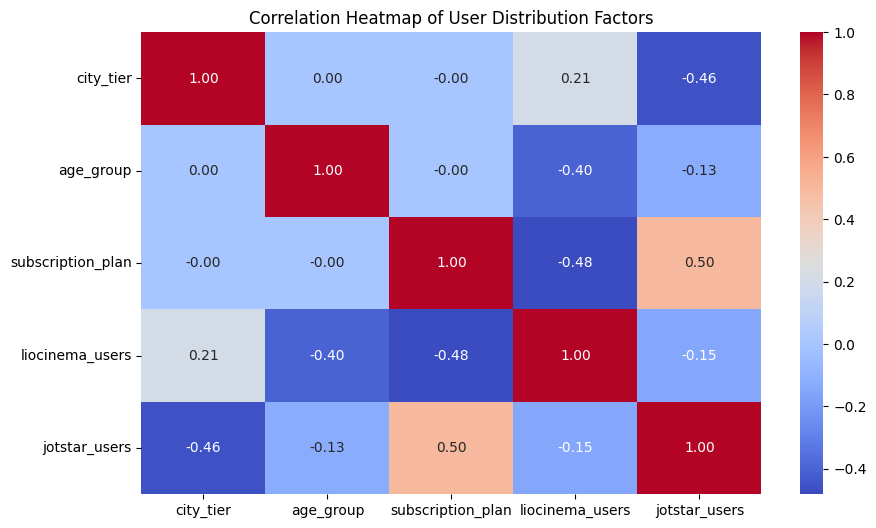

In [9]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert categorical variables to numerical
df_encoded = dist_of_users.copy()
df_encoded['city_tier'] = df_encoded['city_tier'].astype('category').cat.codes
df_encoded['age_group'] = df_encoded['age_group'].astype('category').cat.codes
df_encoded['subscription_plan'] = df_encoded['subscription_plan'].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of User Distribution Factors")
plt.show()


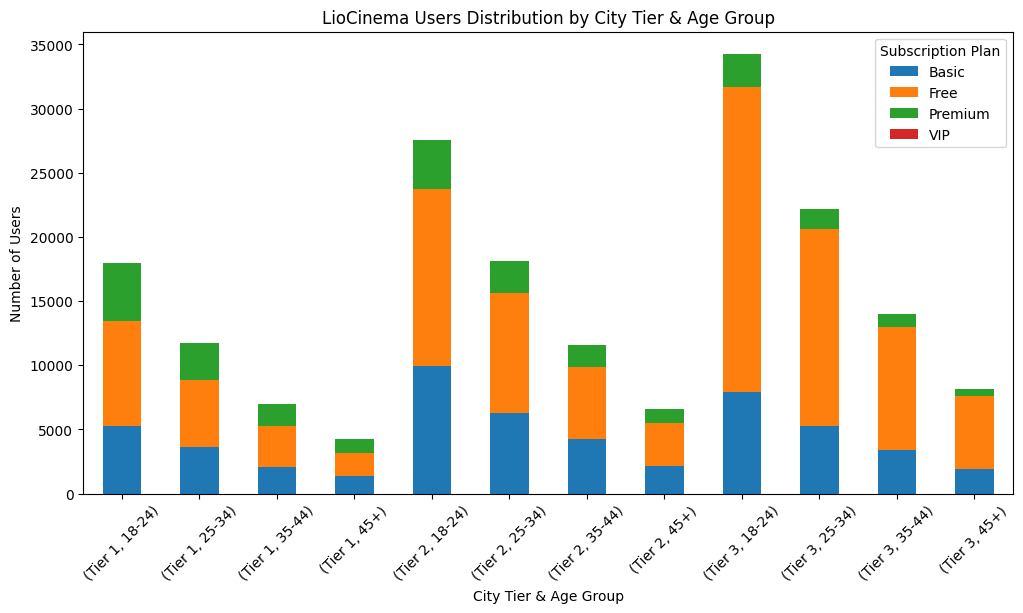

In [10]:
# Stacked bar chart for LioCinema Users
df_pivot = dist_of_users.pivot_table(index=['city_tier', 'age_group'], columns='subscription_plan', values='liocinema_users', aggfunc='sum')
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("LioCinema Users Distribution by City Tier & Age Group")
plt.xlabel("City Tier & Age Group")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(title="Subscription Plan")
plt.show()


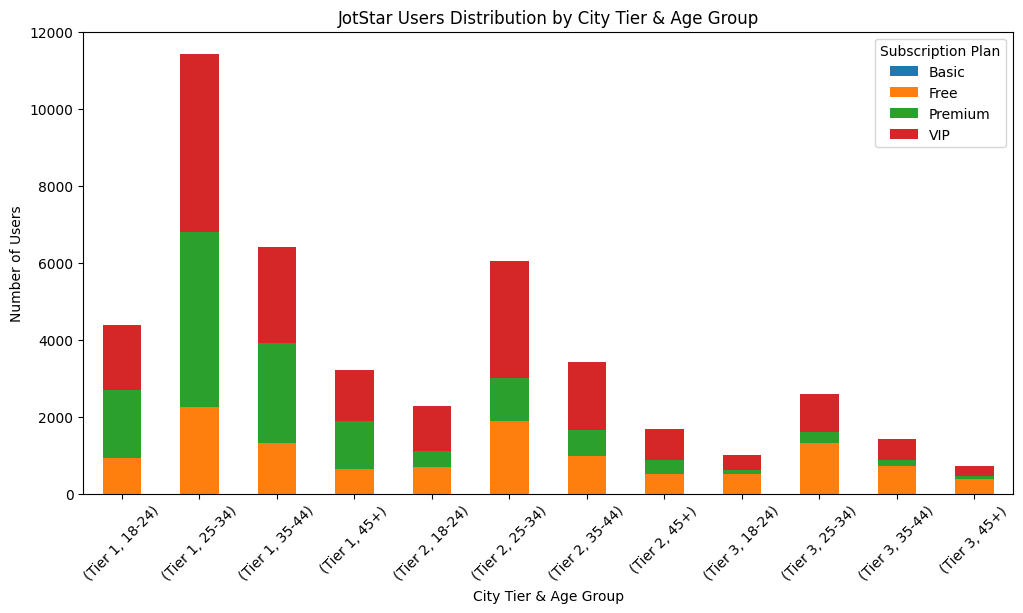

In [11]:
# Stacked bar chart for LioCinema Users
df_pivot = dist_of_users.pivot_table(index=['city_tier', 'age_group'], columns='subscription_plan', values='jotstar_users', aggfunc='sum')
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("JotStar Users Distribution by City Tier & Age Group")
plt.xlabel("City Tier & Age Group")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(title="Subscription Plan")
plt.show()

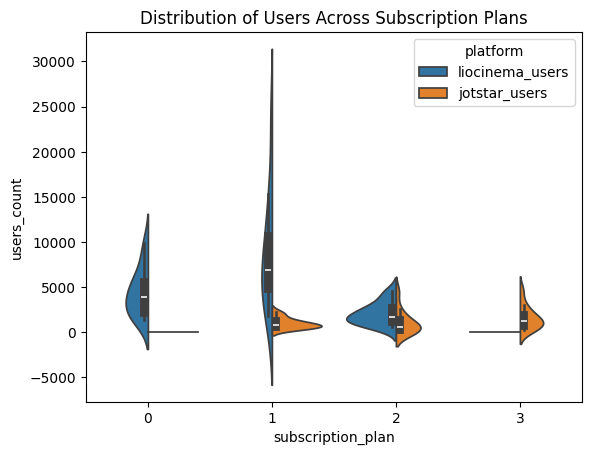

In [12]:
df_melted = df_encoded.melt(
    id_vars=['city_tier', 'age_group', 'subscription_plan'],
    value_vars=['liocinema_users', 'jotstar_users'],
    var_name='platform',
    value_name='users_count'
)
sns.violinplot(data=df_melted, x="subscription_plan", y="users_count", hue="platform", split=True)
plt.title("Distribution of Users Across Subscription Plans")
plt.show()


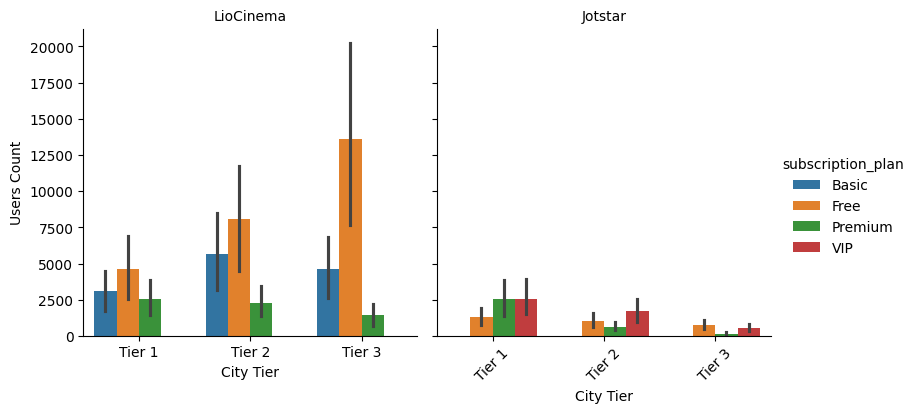

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df= dist_of_users.copy()
# Ensure subscription_plan is categorical
df['subscription_plan'] = df['subscription_plan'].astype('category')

# Melt the dataframe to create a 'platform' column
df_melted = df.melt(id_vars=['city_tier', 'age_group', 'subscription_plan'], 
                     value_vars=['liocinema_users', 'jotstar_users'], 
                     var_name='platform', 
                     value_name='users_count')

# Rename platform values for better readability
df_melted['platform'] = df_melted['platform'].replace({
    'liocinema_users': 'LioCinema',
    'jotstar_users': 'Jotstar'
})

# Plot grouped bar chart by platform
g = sns.catplot(
    data=df_melted, x='city_tier', y='users_count', hue='subscription_plan', 
    col='platform', kind='bar', height=4, aspect=1
)
g.set_axis_labels("City Tier", "Users Count")
g.set_titles("{col_name}")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()



### GROWTH TRENDS

In [24]:
growth_trends.head()

,mon,Jotstar_users,liocinema_users
0,1,3934,6758
1,2,3939,7404
2,3,3954,8397
3,4,3984,9759
4,5,3998,11977


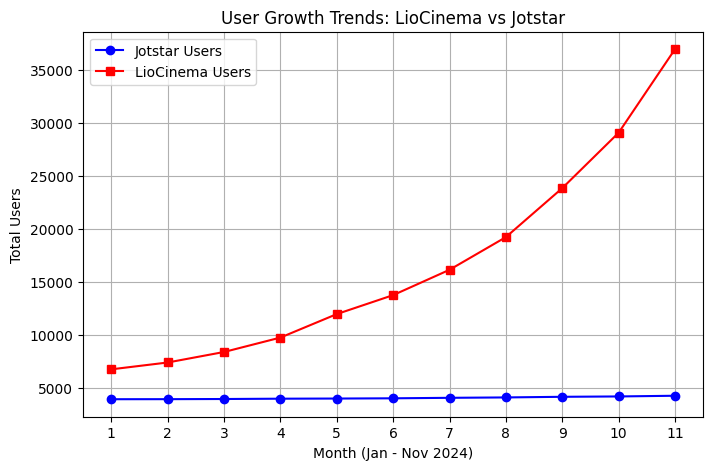

In [29]:
df = growth_trends.copy()

# Plotting
plt.figure(figsize=(8,5))
plt.plot(df['mon'], df['Jotstar_users'], marker='o', linestyle='-', label='Jotstar Users', color='blue')
plt.plot(df['mon'], df['liocinema_users'], marker='s', linestyle='-', label='LioCinema Users', color='red')

# Labels and title
plt.xlabel('Month (Jan - Nov 2024)')
plt.ylabel('Total Users')
plt.title('User Growth Trends: LioCinema vs Jotstar')
plt.xticks(df['mon'])  # Ensure all months are visible
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [30]:
df['Jotstar_users'].sum()

np.int64(44620)

In [31]:
df['liocinema_users'].sum()

np.int64(183446)

### CONTENT LIBRARY COMPARISON

In [34]:
content_library_comparison.head()

,Database_name,total_content,action,comedy,drama,family,romance,crime,horror,thriller,highlights,live_matches,Documentaries
0,Jotstar,2360,398,228,387,10,204,0,0,288,70,249,35
1,liocinema,1250,167,210,395,79,152,38,34,125,12,33,5


In [35]:
df=content_library_comparison.copy()

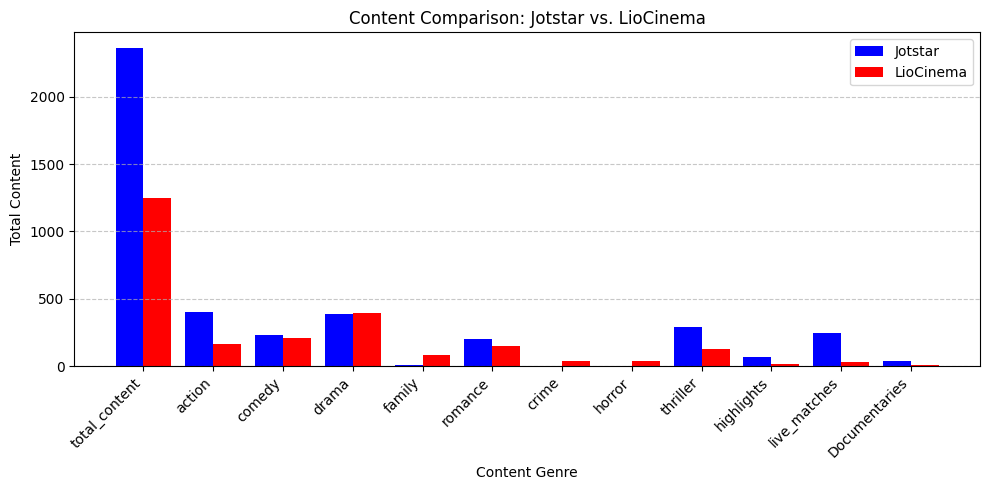

In [36]:
import numpy as np
# Set position for bars
genres = df.columns[1:]  # Exclude 'Database_name'
x = np.arange(len(genres))  # X-axis positions

# Bar width
width = 0.4  

# Plot grouped bars
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, df.iloc[0, 1:], width, label='Jotstar', color='blue')
ax.bar(x + width/2, df.iloc[1, 1:], width, label='LioCinema', color='red')

# Labels and title
ax.set_xlabel("Content Genre")
ax.set_ylabel("Total Content")
ax.set_title("Content Comparison: Jotstar vs. LioCinema")
ax.set_xticks(x)
ax.set_xticklabels(genres, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [37]:
inactivity_comp_to_inactivity.head()

,Db_name,total_users,inactive_users,avg_consumption_time_of_inactive_users,active_users,avg_consumption_time_of_active_users
0,jotstar,133860,19956,1970.9445,113904,7921.6467
1,liocinema,430752,127329,717.3407,303423,1880.7214


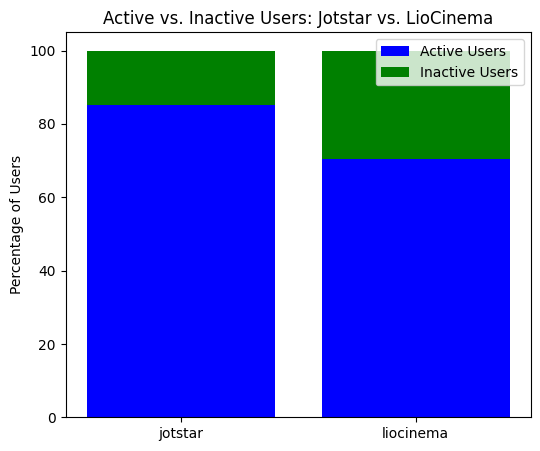

In [40]:
df = inactivity_comp_to_inactivity.copy()

# Convert counts to percentages
df['Inactive %'] = (df['inactive_users'] / df['total_users']) * 100
df['Active %'] = (df['active_users'] / df['total_users']) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(df['Db_name'], df['Active %'], label='Active Users', color='blue')
ax.bar(df['Db_name'], df['Inactive %'], bottom=df['Active %'], label='Inactive Users', color='green')

# Labels and title
ax.set_ylabel('Percentage of Users')
ax.set_title('Active vs. Inactive Users: Jotstar vs. LioCinema')
ax.legend()

# Show plot
plt.show()

In [44]:
watch_time_analysis.head()

,db,city_tier,age_group,mobile_watch_time,tv_watch_time,laptop_watch_time
0,jotstar,Tier 1,18-24,13141.33,6615.93,5828.37
1,jotstar,Tier 1,25-34,11757.89,6588.62,5696.22
2,jotstar,Tier 1,35-44,10997.77,6448.02,5418.52
3,jotstar,Tier 1,45+,9901.88,6335.64,4936.32
4,jotstar,Tier 2,18-24,11096.03,5050.47,4473.02


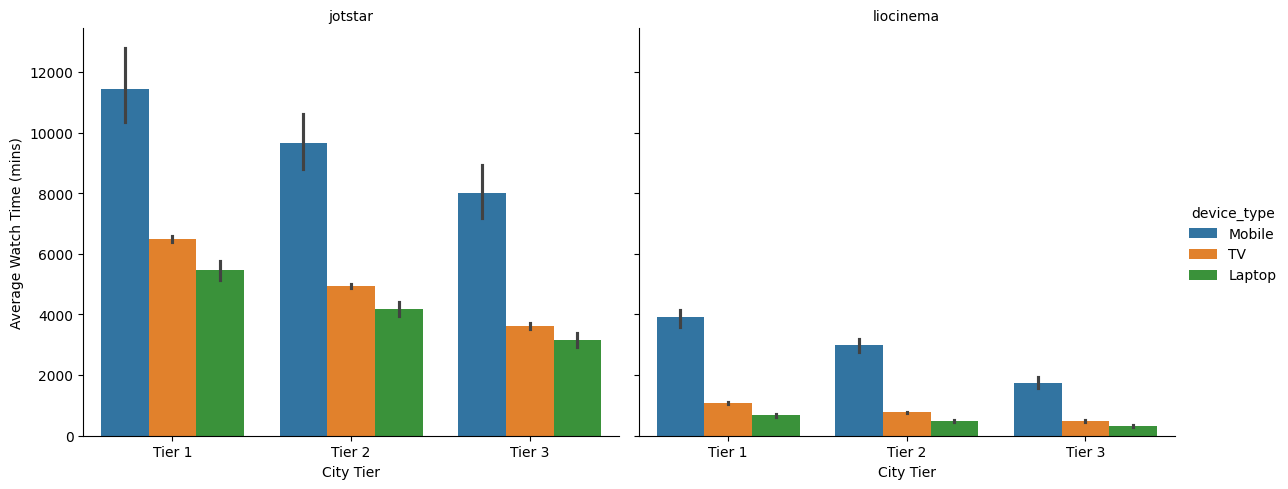

In [46]:
df = pd.DataFrame(watch_time_analysis)

# Melt DataFrame for better visualization
df_melted = df.melt(id_vars=['db', 'city_tier', 'age_group'], 
                     var_name='device_type', value_name='watch_time')

# Rename device_type values for clarity
df_melted['device_type'] = df_melted['device_type'].replace({
    'mobile_watch_time': 'Mobile',
    'tv_watch_time': 'TV',
    'laptop_watch_time': 'Laptop'
})

# Plot
g = sns.catplot(
    data=df_melted, x='city_tier', y='watch_time', hue='device_type', 
    col='db', kind='bar', height=5, aspect=1.2
)

g.set_axis_labels("City Tier", "Average Watch Time (mins)")
g.set_titles("{col_name}")
plt.show()

In [47]:
inactivity_comp_to_inactivity.head()

,Db_name,total_users,inactive_users,avg_consumption_time_of_inactive_users,active_users,avg_consumption_time_of_active_users
0,jotstar,133860,19956,1970.9445,113904,7921.6467
1,liocinema,430752,127329,717.3407,303423,1880.7214


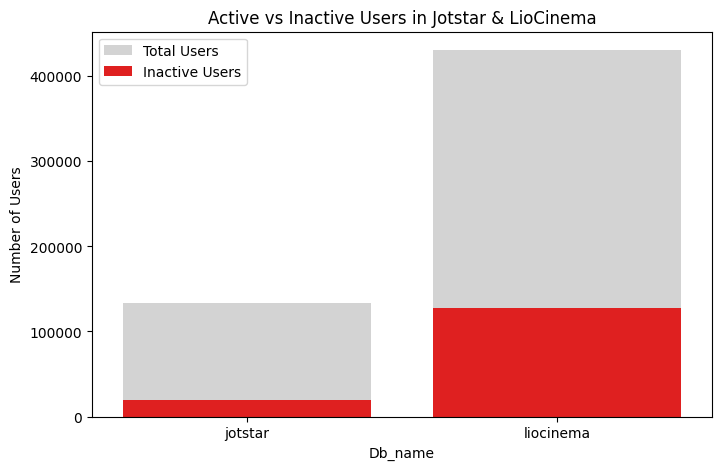

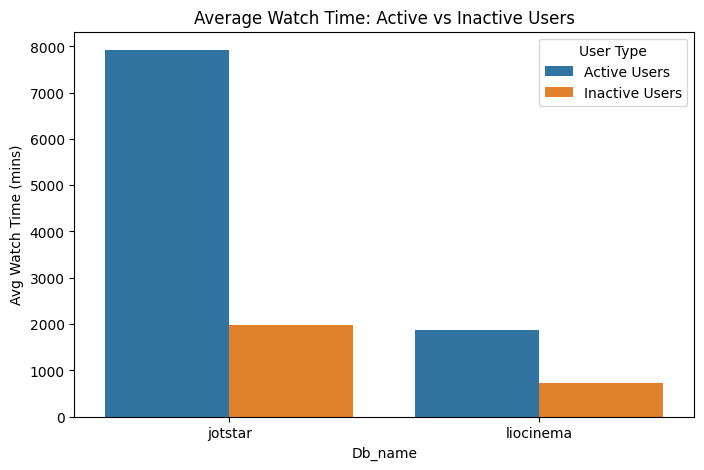

In [48]:
df = pd.DataFrame(inactivity_comp_to_inactivity)

# Plot 1: Active vs. Inactive Users
plt.figure(figsize=(8, 5))
sns.barplot(x="Db_name", y="total_users", data=df, color="lightgray", label="Total Users")
sns.barplot(x="Db_name", y="inactive_users", data=df, color="red", label="Inactive Users")
plt.ylabel("Number of Users")
plt.title("Active vs Inactive Users in Jotstar & LioCinema")
plt.legend()
plt.show()

# Plot 2: Average Watch Time of Active vs. Inactive Users
plt.figure(figsize=(8, 5))
df_melted = df.melt(id_vars=["Db_name"], 
                     value_vars=["avg_consumption_time_of_active_users", "avg_consumption_time_of_inactive_users"],
                     var_name="User Type", value_name="Avg Watch Time (mins)")

df_melted["User Type"] = df_melted["User Type"].replace({
    "avg_consumption_time_of_active_users": "Active Users",
    "avg_consumption_time_of_inactive_users": "Inactive Users"
})

sns.barplot(x="Db_name", y="Avg Watch Time (mins)", hue="User Type", data=df_melted)
plt.title("Average Watch Time: Active vs Inactive Users")
plt.ylabel("Avg Watch Time (mins)")
plt.show()

In [54]:
subscription_changes.head()

,mon,yr,jotstar_downgraded_subscribers,jotstar_upgraded_subscribers,liocinema_downgraded_subscribers,liocinema_upgraded_subscribers
0,NaN,NaN,26961,0,56233,0
1,2.0,2024.0,41,235,427,35
2,3.0,2024.0,85,386,817,58
3,4.0,2024.0,100,437,918,106
4,5.0,2024.0,147,449,1162,156


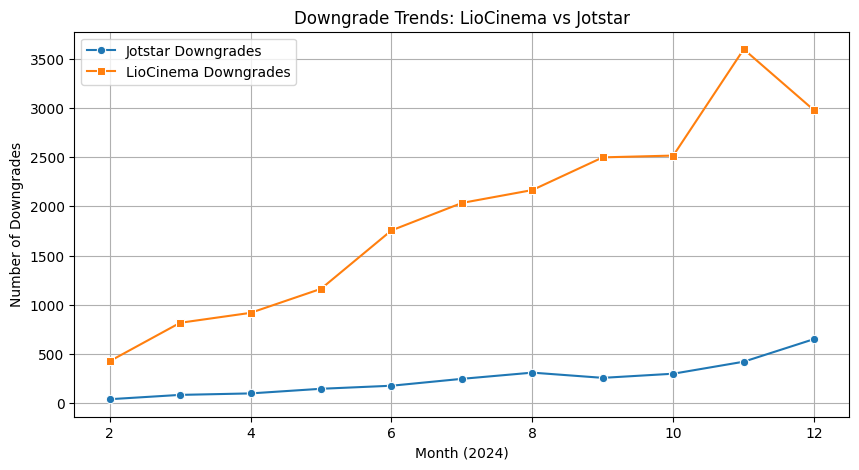

In [56]:
df = subscription_changes.copy()

# Convert month and year to proper string format for plotting
# Exclude the 'Total' row from line plot, since it's an aggregate
df['mon'] = pd.to_numeric(df['mon'], errors='coerce')
df = df.dropna(subset=['mon']) 
monthly_data = df[df['mon'] != 'Total']
monthly_data['mon'] = monthly_data['mon'].astype(int)  # Ensure month is numeric

# Plot downgrade trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_data['mon'], y=monthly_data['jotstar_downgraded_subscribers'], label='Jotstar Downgrades', marker='o')
sns.lineplot(x=monthly_data['mon'], y=monthly_data['liocinema_downgraded_subscribers'], label='LioCinema Downgrades', marker='s')

plt.xlabel("Month (2024)")
plt.ylabel("Number of Downgrades")
plt.title("Downgrade Trends: LioCinema vs Jotstar")
plt.legend()
plt.grid(True)
plt.show()


### UPGRADES

In [80]:
upgrades.head()

,mon,yr,jotstar_premium_changes,jotstar_VIP_changes,liocinema_premium_changes,liocinema_Basic_changes
0,2,2024,28,46,0,16
1,3,2024,65,76,0,24
2,4,2024,64,81,0,52
3,5,2024,66,86,0,83
4,6,2024,65,83,0,91


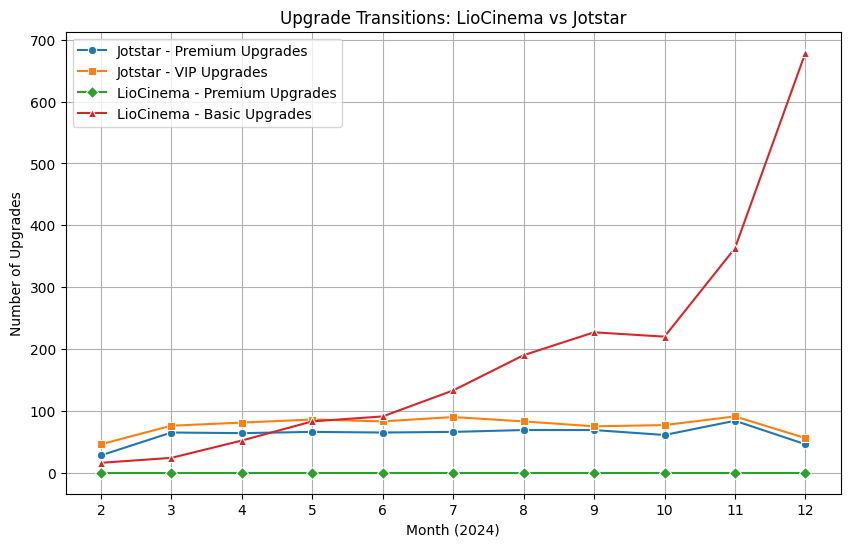

In [81]:
df = upgrades.copy()

plt.figure(figsize=(10, 6))

sns.lineplot(x=df['mon'], y=df['jotstar_premium_changes'], label='Jotstar - Premium Upgrades', marker='o')
sns.lineplot(x=df['mon'], y=df['jotstar_VIP_changes'], label='Jotstar - VIP Upgrades', marker='s')
sns.lineplot(x=df['mon'], y=df['liocinema_premium_changes'], label='LioCinema - Premium Upgrades', marker='D')
sns.lineplot(x=df['mon'], y=df['liocinema_Basic_changes'], label='LioCinema - Basic Upgrades', marker='^')

# Formatting
plt.xlabel("Month (2024)")
plt.ylabel("Number of Upgrades")
plt.title("Upgrade Transitions: LioCinema vs Jotstar")
plt.xticks(df['mon'])  # Ensure months are labeled correctly
plt.legend()
plt.grid(True)

# Show plot
plt.show()

### PAID USER DISTRIBUTION

In [60]:
paid_users_growth.head()

,db_name,city_Tier,total_users,premium_user_pct,VIP_user_pct
0,jotstar,Tier 1,20340,50.0393,49.9607
1,liocinema,Tier 1,22599,45.6038,0.0000
2,jotstar,Tier 2,9360,27.4145,72.5855
3,liocinema,Tier 2,31660,28.7113,0.0000
4,jotstar,Tier 3,2824,22.0609,77.9391


<Figure size 1000x600 with 0 Axes>

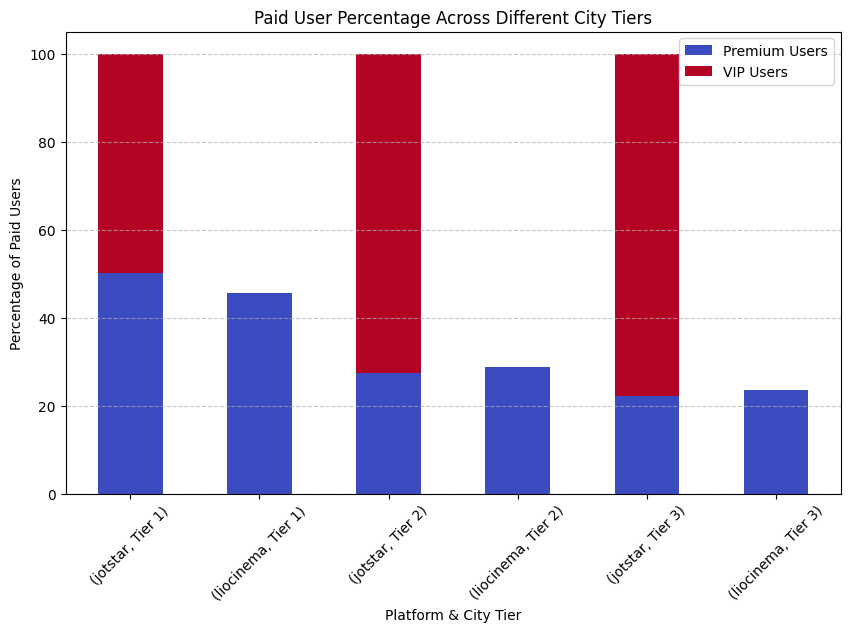

In [62]:
df = paid_users_growth.copy()

# Set the plot style
plt.figure(figsize=(10, 6))

# Bar chart - stacked representation
df.set_index(['db_name', 'city_Tier'])[['premium_user_pct', 'VIP_user_pct']].plot(
    kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm'
)

# Formatting the chart
plt.xlabel("Platform & City Tier")
plt.ylabel("Percentage of Paid Users")
plt.title("Paid User Percentage Across Different City Tiers")
plt.legend(["Premium Users", "VIP Users"])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### REVENUE ANLAYSIS

In [63]:
revenue_analysis.head()

,db_name,total_revenue
0,liocinema,8.854860e+07
1,jotstar,1.009576e+08


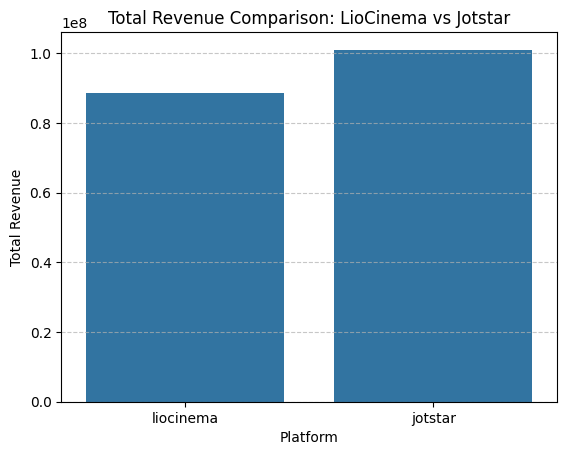

In [70]:
df=revenue_analysis.copy()

sns.barplot(data=df,x='db_name',y='total_revenue')
 
plt.xlabel("Platform")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Comparison: LioCinema vs Jotstar")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
